In [1]:
import pandas as pd
import numpy as np
import plotly as pl

In [2]:
df = pd.read_excel("/Users/roberto/Local Documents/GitHub/pfas-analysis/files/clean_format.xlsx", skiprows=8)

In [3]:
df["PFHpA/375-85-9"] = df["PFHpA/375-85-9"].astype("string").str.replace(" J", "", regex=False)
df["PFHpA/375-85-9"] = df["PFHpA/375-85-9"].astype("string").str.replace("<", "", regex=False)

df["PFHxS/355-46-4"] = df["PFHxS/355-46-4"].astype("string").str.replace(" J", "", regex=False)
df["PFHxS/355-46-4"] = df["PFHxS/355-46-4"].astype("string").str.replace("<", "", regex=False)

df["PFOA/335-67-1"] = df["PFOA/335-67-1"].astype("string").str.replace(" J", "", regex=False)
df["PFOA/335-67-1"] = df["PFOA/335-67-1"].astype("string").str.replace("<", "", regex=False)

df["PFNA/375-95-1"] = df["PFNA/375-95-1"].astype("string").str.replace(" J", "", regex=False)
df["PFNA/375-95-1"] = df["PFNA/375-95-1"].astype("string").str.replace("<", "", regex=False)

df["PFOS/1763-23-1"] = df["PFOS/1763-23-1"].astype("string").str.replace(" J", "", regex=False)
df["PFOS/1763-23-1"] = df["PFOS/1763-23-1"].astype("string").str.replace("<", "", regex=False)

df["PFDA/335-76-2"] = df["PFDA/335-76-2"].astype("string").str.replace(" J", "", regex=False)
df["PFDA/335-76-2"] = df["PFDA/335-76-2"].astype("string").str.replace("<", "", regex=False)

df["total"] = (df["total"].astype("string").replace("ND", pd.NA).astype("Float64"))


In [4]:
df.head(2)

,location,sample_date,location_type,lab_id,PFHpA/375-85-9,PFHxS/355-46-4,PFOA/335-67-1,PFNA/375-95-1,PFOS/1763-23-1,PFDA/335-76-2,total
0,1 Amber Road,2022-05-12,DW,205151,130,1.87,172,14.8,16.2,0.725,333.0
1,1 Amber Road,2022-05-12,FB,205152,2.00,2.00,2.00,2.00,2.00,2.00,<NA>


## Filtering Rules

- Values under 1.999 must be ignored from reports(Reffer to MRL & MDL)

# Significant Figures & Rounding Rules

Default rule: Round  data to 3 significant figures (sig figs).

Apply consistent formatting using these patterns as needed:

0.000 | 0.00 | 00.0 | 000

Thousands separators: Use commas for numbers in the thousands and above (e.g., 1,000; 12,500). No decimals for thousands.

No decimals for hundreds: Do not include decimal places when the value is in the hundreds (e.g., 100, 200, 300).

One decimal place for tens: Use one decimal place when the value is in the tens (e.g., 10.0, 20.0, 30.5).

Two decimal places for units: Use two decimal places when the value is in the ones (e.g., 4.00, 5.02).

When decimals are unknown: If you don’t have information beyond the decimal and need to complete the value for formatting consistency, use trailing zeros (e.g., 10 → 10.0, 4 → 4.00).

Note: Adding trailing zeros does not change the value, it just communicates precision/format.

In [5]:
cols = [
    "PFHpA/375-85-9",
    "PFHxS/355-46-4",
    "PFOA/335-67-1",
    "PFNA/375-95-1",
    "PFOS/1763-23-1",
    "PFDA/335-76-2",
    "total"
]

for col in cols:
    df[col] = df[col].astype("float")

In [6]:
df = df[df['location']=="1 Amber Road"]

# MATPLOTLIB

/var/folders/my/2rn2v0pj6sl0_h7ccsn02cw80000gn/T/ipykernel_60498/508064787.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(date_labels, rotation=45, ha="right")


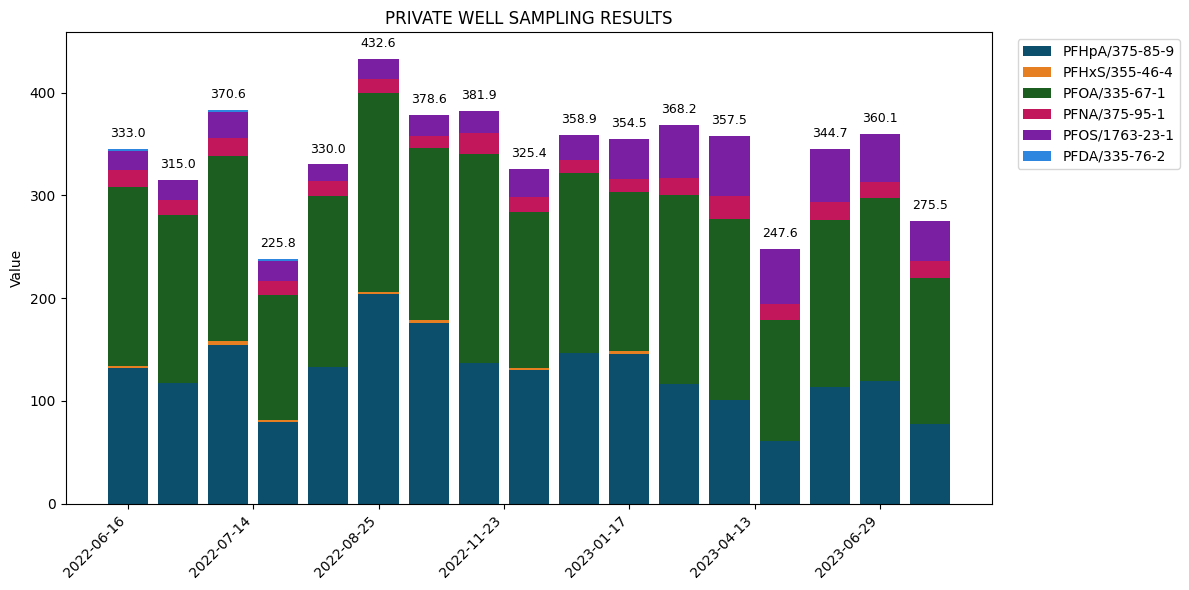

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

date_col = "sample_date"
total_col = "total"
cols = [
    "PFHpA/375-85-9",
    "PFHxS/355-46-4",
    "PFOA/335-67-1",
    "PFNA/375-95-1",
    "PFOS/1763-23-1",
    "PFDA/335-76-2",
]

# Custom colors (edit to match your reference exactly)
color_map = {
    "PFHpA/375-85-9": "#0B4F6C",  # deep teal
    "PFHxS/355-46-4": "#E67E22",  # orange
    "PFOA/335-67-1":  "#1B5E20",  # green
    "PFNA/375-95-1":  "#C2185B",  # magenta
    "PFOS/1763-23-1": "#7B1FA2",  # purple
    "PFDA/335-76-2":  "#2E86DE",  # blue
}

# Ensure numeric
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")
df[total_col] = pd.to_numeric(df[total_col], errors="coerce")

# Ignore values < 2.0
plot_df = df[[date_col, total_col] + cols].copy()
plot_df[cols] = plot_df[cols].where(plot_df[cols] >= 2.0)

# One row per date
plot_df = (
    plot_df.groupby(date_col, as_index=False)[cols + [total_col]]
           .sum(min_count=1)
)

# Sort by date
plot_df = plot_df.sort_values(date_col)

# Categorical x positions for even spacing
x = range(len(plot_df))
date_labels = plot_df[date_col].dt.strftime("%Y-%m-%d")

fig, ax = plt.subplots(figsize=(12, 6))

bottom = pd.Series([0.0] * len(plot_df))
for col in cols:
    values = plot_df[col].fillna(0)
    ax.bar(x, values, bottom=bottom, label=col, color=color_map.get(col))
    bottom += values

# Label totals above each bar
max_height = bottom.max() if len(bottom) else 0
offset = max_height * 0.02 if max_height else 1
for xi, total in zip(x, plot_df[total_col]):
    if pd.notna(total):
        ax.text(xi, bottom.iloc[xi] + offset, f"{total:.1f}",
                ha="center", va="bottom", fontsize=9)

# X-axis formatting (full date strings)s
ax.set_xticklabels(date_labels, rotation=45, ha="right")

# Y-axis headroom
ax.set_ylim(0, max_height + offset * 3)

ax.set_title("PRIVATE WELL SAMPLING RESULTS")
ax.set_ylabel("Value")
ax.legend(title="", loc="upper left", bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()
